<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/preprocessing_Synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing  import MinMaxScaler

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from TS_utils import Synthetic_TS_generator
stg = Synthetic_TS_generator(noise=False)
X_synthetic = stg.get_array()

In [10]:
X = X_synthetic

In [11]:
X_synthetic

array([[0.31356611, 0.28547265, 0.23430343, ..., 0.91509807, 0.97002507,
        1.        ],
       [0.        , 0.03742975, 0.10706596, ..., 0.74091648, 0.7045483 ,
        0.68395992],
       [1.        , 0.97718499, 0.93446617, ..., 0.06553383, 0.02281501,
        0.        ],
       ...,
       [0.        , 0.02281501, 0.06553383, ..., 0.93446617, 0.97718499,
        1.        ],
       [0.66132581, 0.6800518 , 0.71455691, ..., 0.92423985, 0.9737368 ,
        1.        ],
       [1.        , 0.95991462, 0.88770538, ..., 0.75650804, 0.69922071,
        0.66663739]])

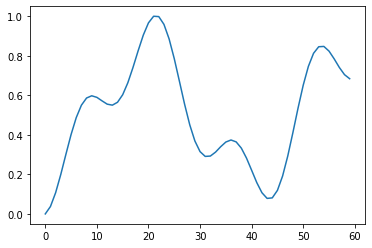

In [14]:
plt.plot(X_synthetic[1])

### How we achieve multiscale data points

Two methods

* By picking prices every consecutive, alterate and every 2 days 

* By picking consecutive prices for 50, 100, 150 days.

Please see methods `get_multiscale_skipped_values` and `get_multiscale_consecutive_values`



In [17]:
def get_multiscale_skipped_values(df_start_end):
  days_60 = df_start_end[-60:]
  days_40 = [0 if i % 2 else x for i, x in enumerate(days_60)]
  days_20 = [0 if i % 3 else x for i, x in enumerate(days_60)]
  dictionary = {'60_days': np.array(days_60), '40_days': np.array(days_40), 
                '20_days': np.array(days_20)}
  return dictionary

def get_multiscale_consecutive_values(df_start_end):
  days_20 = df_start_end[-20:]
  days_40 = df_start_end[-40:]
  days_60 = df_start_end[-60:]
  
  days_20_all = np.append(np.zeros((40)), days_20 ,0)
  days_40_all = np.append(np.zeros((20)), days_40,0)
  
  dictionary = {'20_days': np.array(days_20_all), '40_days': np.array(days_40_all),
                    '60_days': days_60}
  return dictionary


skipped_values = []
consecutive_values = []
n = 0
for df in X_synthetic:
 
  n = n + 1
  if n%1000 == 0:
    print("{} stocksout of {} completed".format(n,len(X_synthetic)))
  
  dictionary_skipped_values = get_multiscale_skipped_values(df)
  dictionary_consecutive_values = get_multiscale_consecutive_values(df)
 
  datapoint_skipped_values = pd.DataFrame(dictionary_skipped_values).to_numpy()
  datapoint_consecutive_values = pd.DataFrame(dictionary_consecutive_values).to_numpy()


  skipped_values.append(datapoint_skipped_values)
  consecutive_values.append(datapoint_consecutive_values)


1000 stocksout of 3000 completed
2000 stocksout of 3000 completed
3000 stocksout of 3000 completed


In [18]:
np.save("/content/drive/My Drive/capstone/skipped_values_Synthetic.npy", skipped_values)
np.save("/content/drive/My Drive/capstone/consecutive_values_Synthetic.npy", consecutive_values)

## Visualization of data points

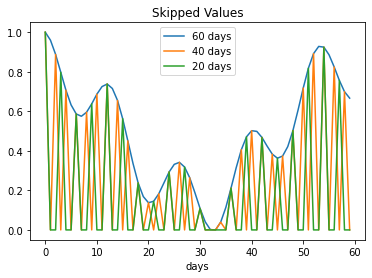

In [19]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.plot(datapoint_skipped_values)
ax.set_title("Skipped Values") 
ax.set(xlabel='days')
ax.legend(['60 days', '40 days', '20 days'])

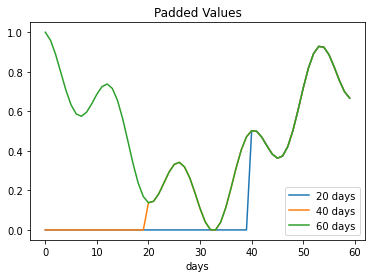

In [20]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.plot(datapoint_consecutive_values)
ax.set_title("Padded Values") 
ax.set(xlabel='days')
ax.legend(['20 days', '40 days', '60 days'])